In [1]:
# suppress tensorflow logging, usually not useful unless you are having problems with tensorflow or accessing gpu
# it seems necessary to have this environment variable set before tensorflow is imported, or else it doesn't take effect
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# imports generally useful throughout the notebook
# usually all imports should happen at the top of a notebook, but in
# these notebooks where the purpose is to show how to use the Keras API
# the relevant imports will happen in the cells where the API is discussed
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# global settings for notebook output and images
plt.rcParams['figure.figsize'] = (8, 8) # set default figure size, 10in by 8in
np.set_printoptions(precision=4, suppress=True)

In [2]:
# import project defined modules / functions used in this notebook
# ensure that the src directory where project modules are found is on
# the PYTHONPATH
import sys
sys.path.append("../src")

# assignment function imports for doctests and github autograding
# these are required for assignment autograding
from nndl import vectorize_samples, plot_history

In [3]:
# if want to restrict to cpu or gpu, configure visible device for rest of notebook to use
#dev = tf.config.list_physical_devices()
#print('Available Devices : ', dev)
#tf.config.set_visible_devices(dev[0], 'CPU')
#tf.config.set_visible_devices(dev[1], 'GPU')

In [4]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

train_data = vectorize_samples(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7850 - loss: 0.5228 - val_accuracy: 0.8380 - val_loss: 0.4213
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8949 - loss: 0.3267 - val_accuracy: 0.8882 - val_loss: 0.3113
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9201 - loss: 0.2441 - val_accuracy: 0.8888 - val_loss: 0.2858
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9325 - loss: 0.1981 - val_accuracy: 0.8845 - val_loss: 0.2894
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9472 - loss: 0.1652 - val_accuracy: 0.8907 - val_loss: 0.2750
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9571 - loss: 0.1400 - val_accuracy: 0.8785 - val_loss: 0.3139
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9639 - loss: 0.1192 - val_accuracy: 0.8859 - val_loss: 0.2935
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9704 - loss: 0.1035 - val_accuracy: 0.8839 - val_los

In [7]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_smaller_model = model.fit(train_data, train_labels,
                                  epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7653 - loss: 0.5853 - val_accuracy: 0.8361 - val_loss: 0.4947
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8747 - loss: 0.4258 - val_accuracy: 0.8660 - val_loss: 0.3957
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8988 - loss: 0.3314 - val_accuracy: 0.8768 - val_loss: 0.3390
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9142 - loss: 0.2710 - val_accuracy: 0.8833 - val_loss: 0.3059
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9270 - loss: 0.2288 - val_accuracy: 0.8884 - val_loss: 0.2848
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9363 - loss: 0.1989 - val_accuracy: 0.8888 - val_loss: 0.2774
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9441 - loss: 0.1741 - val_accuracy: 0.8874 - val_loss: 0.2802
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9522 - loss: 0.1550 - val_accuracy: 0.8878 - val_los

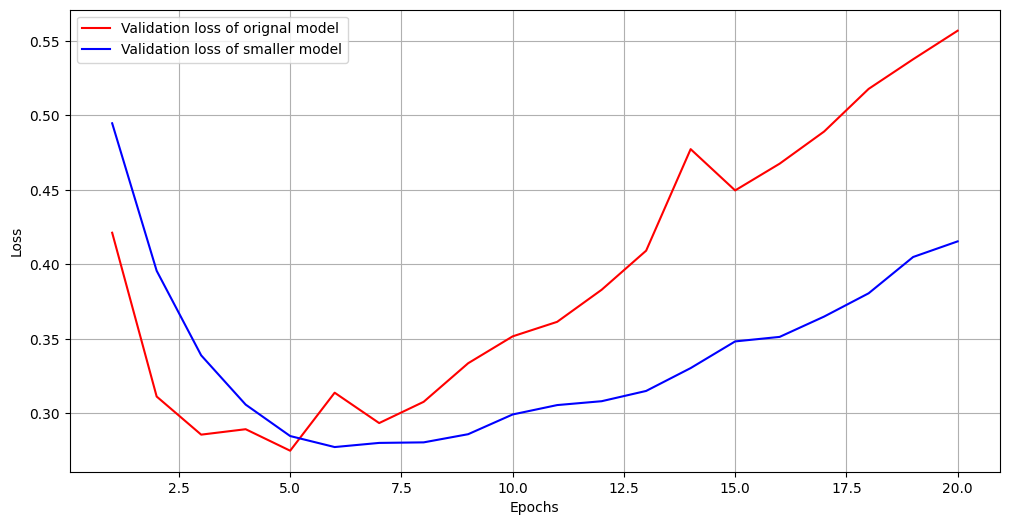

In [8]:
plt.figure(figsize=(12,6))
epochs = np.arange(1, len(history_original.history['val_loss']) + 1)
plt.plot(epochs, history_original.history['val_loss'], 'r-', label='Validation loss of orignal model')
plt.plot(epochs, history_smaller_model.history['val_loss'], 'b-', label='Validation loss of smaller model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend();

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_larger_model = model.fit(train_data, train_labels,
                                 epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7233 - loss: 0.5703 - val_accuracy: 0.8482 - val_loss: 0.3698
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8671 - loss: 0.3209 - val_accuracy: 0.8732 - val_loss: 0.3085
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9045 - loss: 0.2350 - val_accuracy: 0.8854 - val_loss: 0.2860
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9239 - loss: 0.1990 - val_accuracy: 0.8898 - val_loss: 0.2782
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9421 - loss: 0.1521 - val_accuracy: 0.8902 - val_loss: 0.2896
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9621 - loss: 0.1139 - val_accuracy: 0.8872 - val_loss: 0.3207
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9739 - loss: 0.0856 - val_accuracy: 0.8842 - val_loss: 0.3416
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9791 - loss: 0.0777 - val_accuracy: 0.8858 - v

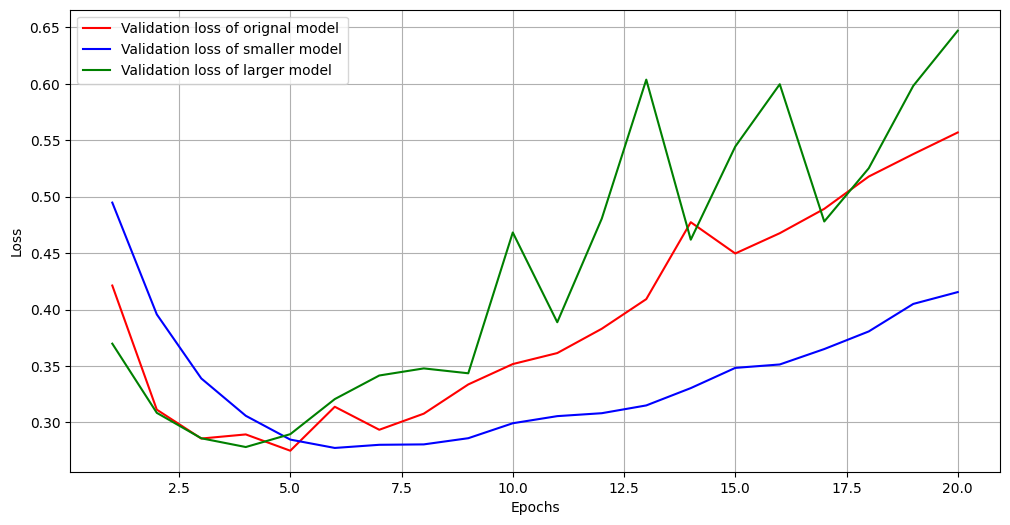

In [10]:
plt.figure(figsize=(12,6))
epochs = np.arange(1, len(history_original.history['val_loss']) + 1)
plt.plot(epochs, history_original.history['val_loss'], 'r-', label='Validation loss of orignal model')
plt.plot(epochs, history_smaller_model.history['val_loss'], 'b-', label='Validation loss of smaller model')
plt.plot(epochs, history_larger_model.history['val_loss'], 'g-', label='Validation loss of larger model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend();

In [13]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, 
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16, 
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(train_data, train_labels,
                           epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7693 - loss: 0.6010 - val_accuracy: 0.8371 - val_loss: 0.4904
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8930 - loss: 0.3978 - val_accuracy: 0.8860 - val_loss: 0.3847
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9177 - loss: 0.3242 - val_accuracy: 0.8806 - val_loss: 0.3736
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9261 - loss: 0.2887 - val_accuracy: 0.8901 - val_loss: 0.3539
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9347 - loss: 0.2680 - val_accuracy: 0.8882 - val_loss: 0.3539
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9431 - loss: 0.2493 - val_accuracy: 0.8705 - val_loss: 0.3984
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9452 - loss: 0.2422 - val_accuracy: 0.8822 - val_loss: 0.3724
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9485 - loss: 0.2322 - val_accuracy: 0.8813 - val_loss

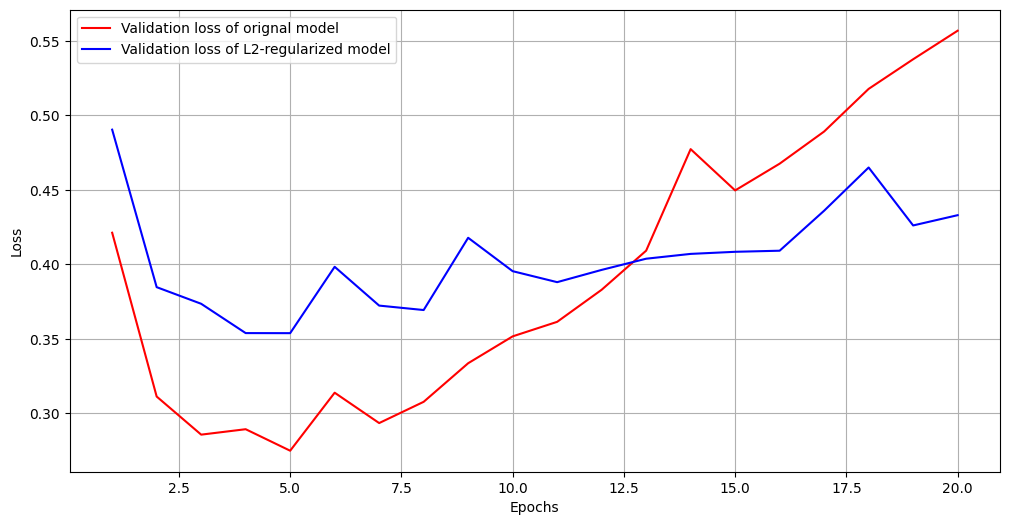

In [14]:
plt.figure(figsize=(12,6))
epochs = np.arange(1, len(history_original.history['val_loss']) + 1)
plt.plot(epochs, history_original.history['val_loss'], 'r-', label='Validation loss of orignal model')
plt.plot(epochs, history_l2_reg.history['val_loss'], 'b-', label='Validation loss of L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend();

As you should usually see, the model with L2 regularization has become more resistant to overfitting.  Overfitting
occurs later in the training epochs and proceeds more slowly, even though both models have the same
capacity (same number of trainable parameters).

As an alternative to L2 regularization, you can use L1 regularization (which computes the
error using the absolute value of the weights), or you can combine and use both L1 and
L2 regularization together.

```python
from tensorflow.keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# simultaneous L1 and L2 regularization
regularizers.l1_l2(l1=0.001, l2=0.001)
```

Note that weight regularization is more typically used for smaller deep learning models.  Large
deep learningmodels tend to be so overparameterized that imposing constraints on weight values
hasn't much impact on model capacity and generalization.  In these cases, a different 
regularization technieque is prefered for neural network like models: dropout.

In [15]:
# to illustrate, an output layer has shape 5 samples by 10 features (5, 10)
layer_output = np.random.randn(5, 10)
print(layer_output)

[[-0.3202 -0.4523 -1.9086  1.1544  1.8809  0.9556 -0.1507 -0.1803 -0.8815
   0.2774]
 [-1.4068 -1.0521  0.5565  1.8804 -0.3056  0.2955 -0.6912 -1.1635  1.4032
   0.2935]
 [-2.0144 -0.4038 -0.5197  0.1644  1.1908 -2.2535 -0.2066  0.1125 -0.215
   0.6342]
 [ 0.8769  0.3321  0.286  -1.1505  0.2066 -0.6507 -0.3792 -0.5655  0.2219
  -0.1564]
 [-0.4162 -0.274   0.3954 -1.6023  1.2778  0.552  -0.0369 -1.1032 -1.6634
  -2.1333]]


In [16]:
# generate a random matrix of random intigers of the same shape, 50% 0 and 50% 1
dropout_mask = np.random.randint(0, high=2, size=layer_output.shape)
print(dropout_mask)

[[1 1 1 1 1 1 1 0 0 0]
 [1 1 0 1 1 1 1 0 1 0]
 [1 0 0 0 1 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1]
 [1 1 1 1 1 1 0 1 1 0]]


In [17]:
# multiplying by mask randomly drops out 50% of the output values
layer_output_dropped = layer_output * dropout_mask
print(layer_output_dropped)

[[-0.3202 -0.4523 -1.9086  1.1544  1.8809  0.9556 -0.1507 -0.     -0.
   0.    ]
 [-1.4068 -1.0521  0.      1.8804 -0.3056  0.2955 -0.6912 -0.      1.4032
   0.    ]
 [-2.0144 -0.     -0.      0.      1.1908 -2.2535 -0.      0.     -0.
   0.    ]
 [ 0.      0.3321  0.     -0.      0.     -0.     -0.     -0.5655  0.
  -0.1564]
 [-0.4162 -0.274   0.3954 -1.6023  1.2778  0.552  -0.     -1.1032 -1.6634
  -0.    ]]


At test time, we scale down the output by the dropout rate.  So if we were
using a 50% dropout, when we do predictions for testing, all weights would
be scaled down by 50%.  This is because the size of the weights learned with
dropouts will be 50% larger than if no dropout were used.  So to
compensate once we finish training, we scale down by the same amount so
that we get a similar output level as we do when dropout is being applied.

In [18]:
# At test time, when making predictions, scale down output
layer_output = layer_output * 0.5
print(layer_output)

[[-0.1601 -0.2262 -0.9543  0.5772  0.9405  0.4778 -0.0753 -0.0902 -0.4407
   0.1387]
 [-0.7034 -0.5261  0.2782  0.9402 -0.1528  0.1477 -0.3456 -0.5817  0.7016
   0.1468]
 [-1.0072 -0.2019 -0.2599  0.0822  0.5954 -1.1267 -0.1033  0.0562 -0.1075
   0.3171]
 [ 0.4384  0.1661  0.143  -0.5752  0.1033 -0.3254 -0.1896 -0.2827  0.111
  -0.0782]
 [-0.2081 -0.137   0.1977 -0.8011  0.6389  0.276  -0.0184 -0.5516 -0.8317
  -1.0666]]


Note that this process can be implemented by doing both operations at training
time, and leaving the output unchanged at test time, which is often the
way it's implemented in practice.

This technique may not make sense to you at first thought, how does
randomly zeroing out output results during training improve
generaliztion of the network while learning?  The core idea is that introducing
noise in the output values of a layer can break up happenstance patterns that aren’t significant.

In `keras` we can introduce dropout regularization to a model by inserting `Dropout` layers
in the network architecture. A `Dropout` layer is applied to the output of the
layer immediately preceeding it.  Let's add `Dropout` layers in the IMDB model
to see how well they do at reducing overfitting.

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6282 - loss: 0.6426 - val_accuracy: 0.8326 - val_loss: 0.5426
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7558 - loss: 0.5331 - val_accuracy: 0.8658 - val_loss: 0.4204
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8110 - loss: 0.4518 - val_accuracy: 0.8813 - val_loss: 0.3678
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8478 - loss: 0.3865 - val_accuracy: 0.8792 - val_loss: 0.3243
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8687 - loss: 0.3355 - val_accuracy: 0.8874 - val_loss: 0.2927
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8876 - loss: 0.3005 - val_accuracy: 0.8920 - val_loss: 0.2758
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9034 - loss: 0.2652 - val_accuracy: 0.8936 - val_loss: 0.2733
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9165 - loss: 0.2373 - val_accuracy: 0.8860 - val_loss

And again lets compare the effect of dropout regularization on validation loss with what the original
model without dropout was doing.

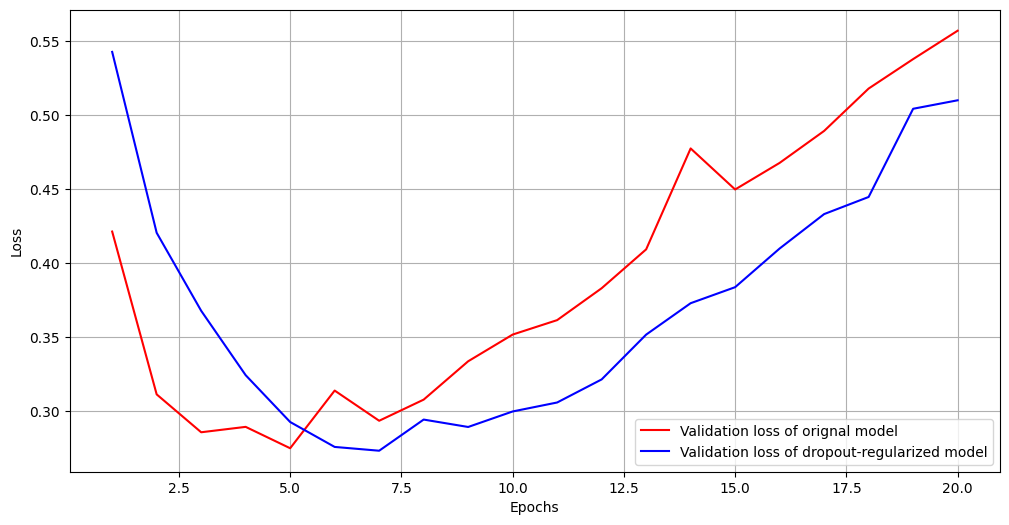

In [20]:
plt.figure(figsize=(12,6))
epochs = np.arange(1, len(history_original.history['val_loss']) + 1)
plt.plot(epochs, history_original.history['val_loss'], 'r-', label='Validation loss of orignal model')
plt.plot(epochs, history_dropout.history['val_loss'], 'b-', label='Validation loss of dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend();

Usually you will see a similar effect as with the L1/L2 regularization.  Overfitting will occur later and validation loss will
degrade slower than for the unregularized original model.

To recap, here is what you should remember about the most common ways to maximize generalization and
prevent overfitting in neural network models:

<font color='blue'>

- Get more training data, or better training data.
- Develop better features.
- Reduce the capacity of the model.
- Add weight regularization (for smaller models).
- Add dropout.

# Chapter Summary

Things to remember about fundamental Machine Learning concepts in the context of training neural networks and
deep network models:

<font color='blue'>

- The purpose of a machine learning model is to generalize: to perform accurately
  on never-before-seen inputs.
- A deep neural network achieves generalization by learning a parametric model
  that can successfully interpolate between training samples (learning a latent manifold).
- The fundamental problem in machine learning is the tension between optimization
  and generalization.  To again generalization you must first achieve a good
  fit to the model, but improving a models fit (training loss) will inevitably start
  hurting generalization.  **Every single deep learning best practice deals with managing this tension**.
- The ability of deep learning models to generalize comes from the fact that they
  manage to learn to approximate the latent manifold of their data, and can thus
  make sense of new inputs via interpolation.
- It’s essential to be able to accurately evaluate the generalization power of your
  model while you’re developing it.
  - Simple holdout validation
  - K-fold cross-validation and iterated K-fold cross-validation (especially when size of data is small)
  - Test set needs to be kept for final model evaluation, not used when validating models.
- When you start working on a model, your goal is first to achieve a model that
  has some generalization power and that can overfit.
- As your model starts overfitting, your goal switches to improving generalization
  through model regularization. You can reduce your model’s capacity, add dropout
  or weight regularization, and use early stopping. And naturally, a larger or better
  dataset is always the number one way to help a model generalize.